In [37]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


input_folder = "Input_Images"
threshold = 150

In [38]:
# Create Algorithm for Thresholding Image 

def convert_binary(image_matrix, thresh_val):
    white = 255
    black = 0
    
    initial_conv = np.where((image_matrix <= thresh_val), image_matrix, white)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, black)
    
    return final_conv

In [39]:
# Create Algorithm for Binarizing an image

def binarize_image(image, thresh_val=127, with_plot=False, gray_scale=False):

    im=image
    
    if not gray_scale:
        cmap_val = None
        r_img, g_img, b_img = im[:, :, 0], im[:, :, 1], im[:, :, 2]
        
        r_b = convert_binary(image_matrix=r_img, thresh_val=thresh_val)
        g_b = convert_binary(image_matrix=g_img, thresh_val=thresh_val)
        b_b = convert_binary(image_matrix=b_img, thresh_val=thresh_val)
        
        image_b = np.dstack(tup=(r_b, g_b, b_b))
    else:
        cmap_val = 'gray'
        image_b = convert_binary(image_matrix=im, thresh_val=thresh_val)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(im, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

Wooden_Interior
Wooden_Interior_04
Wooden_Interior_01


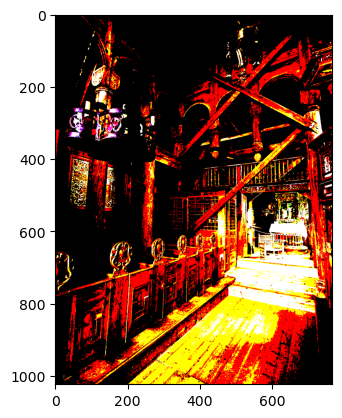

In [40]:
# Loop through folder and generate binarize images

input_images_array= Path(input_folder).glob('*.jpeg')

for image in input_images_array:
        # Load image, load the filename and convert the image to an array.
        filename = os.path.basename(image).split('.',1)[0]
        im = Image.open(image)
        im = np.asarray(im)
        print(f"{filename}")

        im_filtered = binarize_image(image=im,thresh_val=threshold)


        
        # Save the Edged X-Direction images into the folder directory named "02_Gradient_Edge_Detection_X"  
        plt.imsave(f"Output_Images/{filename}_binarized.png",
                im_filtered.astype(np.uint8),
                cmap=plt.cm.Greys_r
            )
